In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
station_stats = pd.read_parquet("../../../aggregated_data/station_delay_stats.parquet")
station_stats.columns

Index(['station_name', 'Latitude', 'Longitude', 'avg_delay',
       'cancellation_rate', 'sample_size'],
      dtype='object')

In [2]:
url = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"
world = gpd.read_file(url)
germany = world[world['name'] == "Germany"].to_crs(epsg=3035)

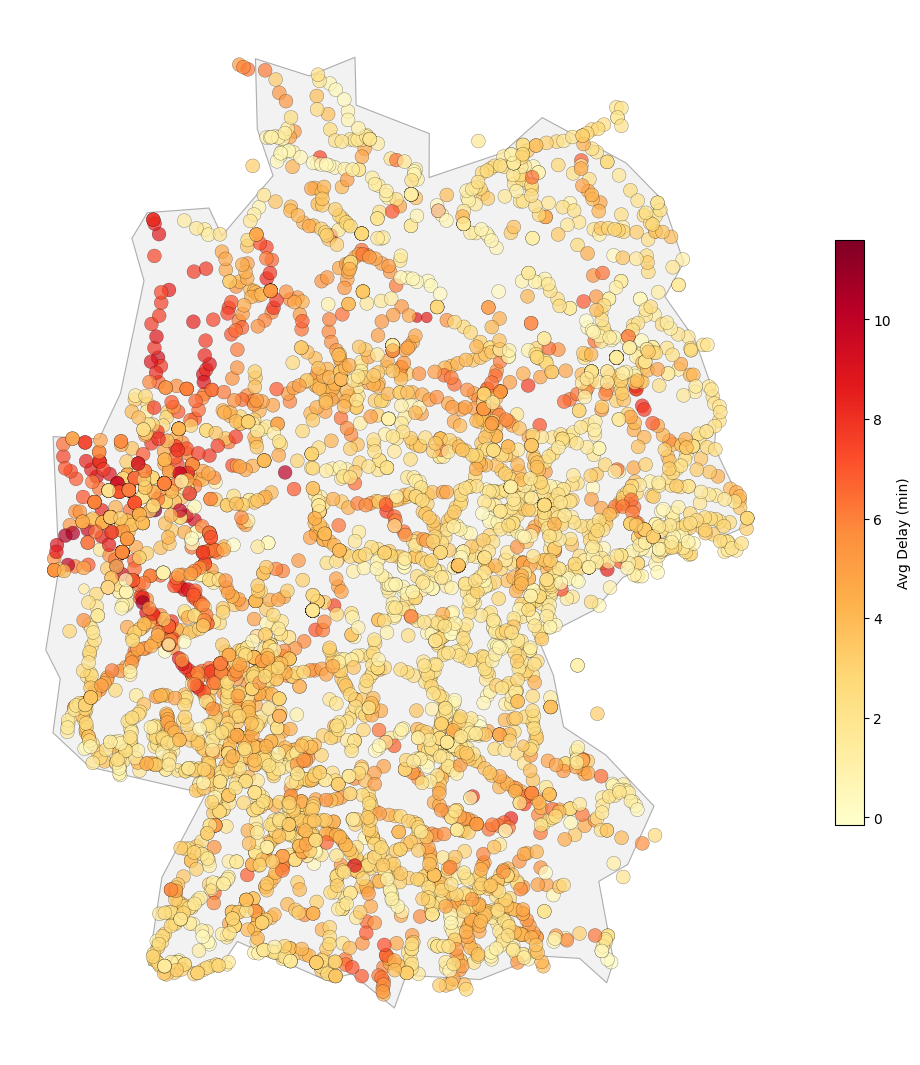

In [4]:
gdf = gpd.GeoDataFrame(
    station_stats,
    geometry=gpd.points_from_xy(station_stats.Longitude, station_stats.Latitude),
    crs="EPSG:4326"
).to_crs(epsg=3035)

fig, ax = plt.subplots(figsize=(10, 12))

germany.plot(ax=ax, color='#f2f2f2', edgecolor='#adadad', linewidth=0.8)

# Delay Data
scatter = gdf.plot(
    ax=ax,
    column='avg_delay',
    cmap='YlOrRd',
    legend=True,
    markersize=gdf['sample_size'].clip(upper=200) * 0.5,
    alpha=0.7,
    # vmax=30,
    edgecolor='black',
    linewidth=0.2,
    legend_kwds={'label': "Avg Delay (min)", 'shrink': 0.5}
)
ax.set_axis_off()
# Save and Show
plt.tight_layout()
plt.show()


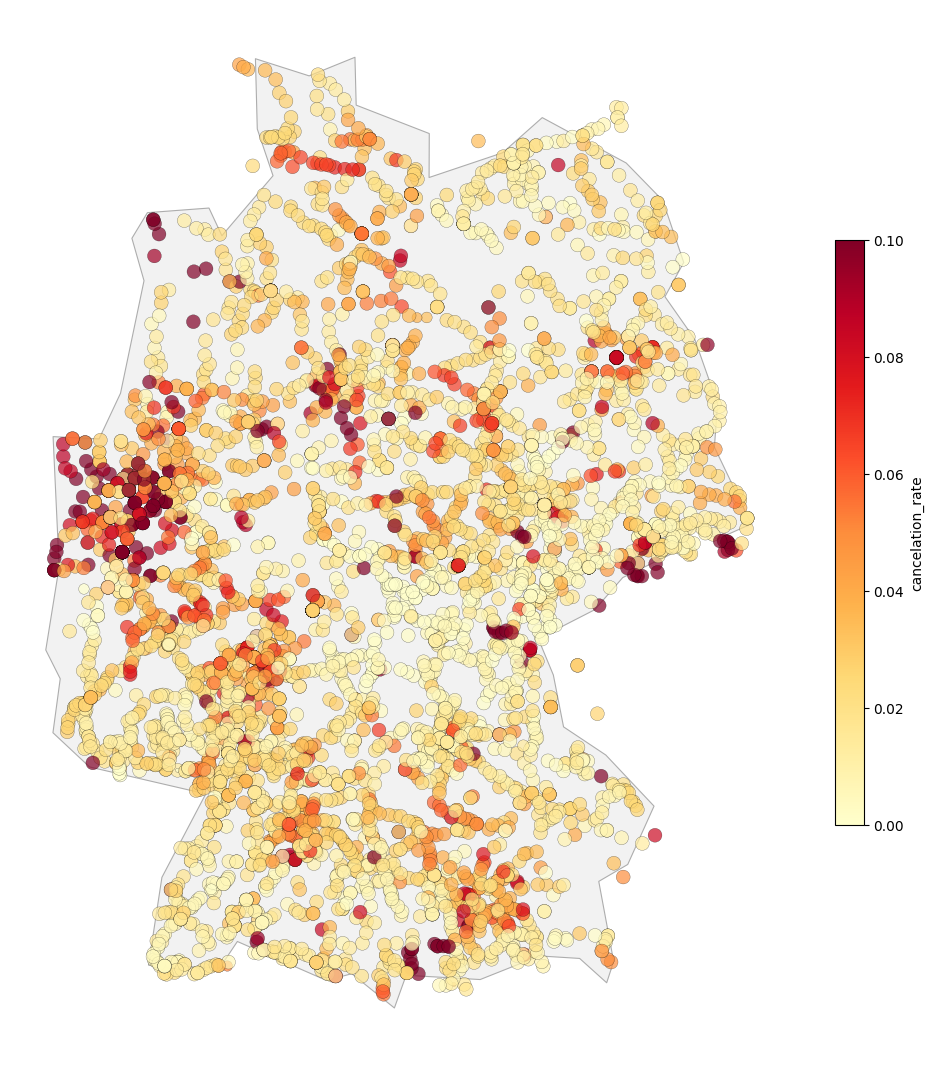

In [5]:
fig, ax = plt.subplots(figsize=(10, 12))
germany.plot(ax=ax, color='#f2f2f2', edgecolor='#adadad', linewidth=0.8)

# Delay Data
scatter = gdf.plot(
    ax=ax,
    column='cancellation_rate',
    cmap='YlOrRd',
    legend=True,
    markersize=gdf['sample_size'].clip(upper=200) * 0.5,
    alpha=0.7,
    vmax=0.1,
    edgecolor='black',
    linewidth=0.2,
    legend_kwds={'label': "cancelation_rate", 'shrink': 0.5}
)
ax.set_axis_off()
# Save and Show
plt.tight_layout()
plt.show()

In [6]:
station_delay_ICE = pd.read_parquet("../../../aggregated_data/station_delay_ICE.parquet")
station_stats.columns

Index(['station_name', 'Latitude', 'Longitude', 'avg_delay',
       'cancellation_rate', 'sample_size'],
      dtype='object')

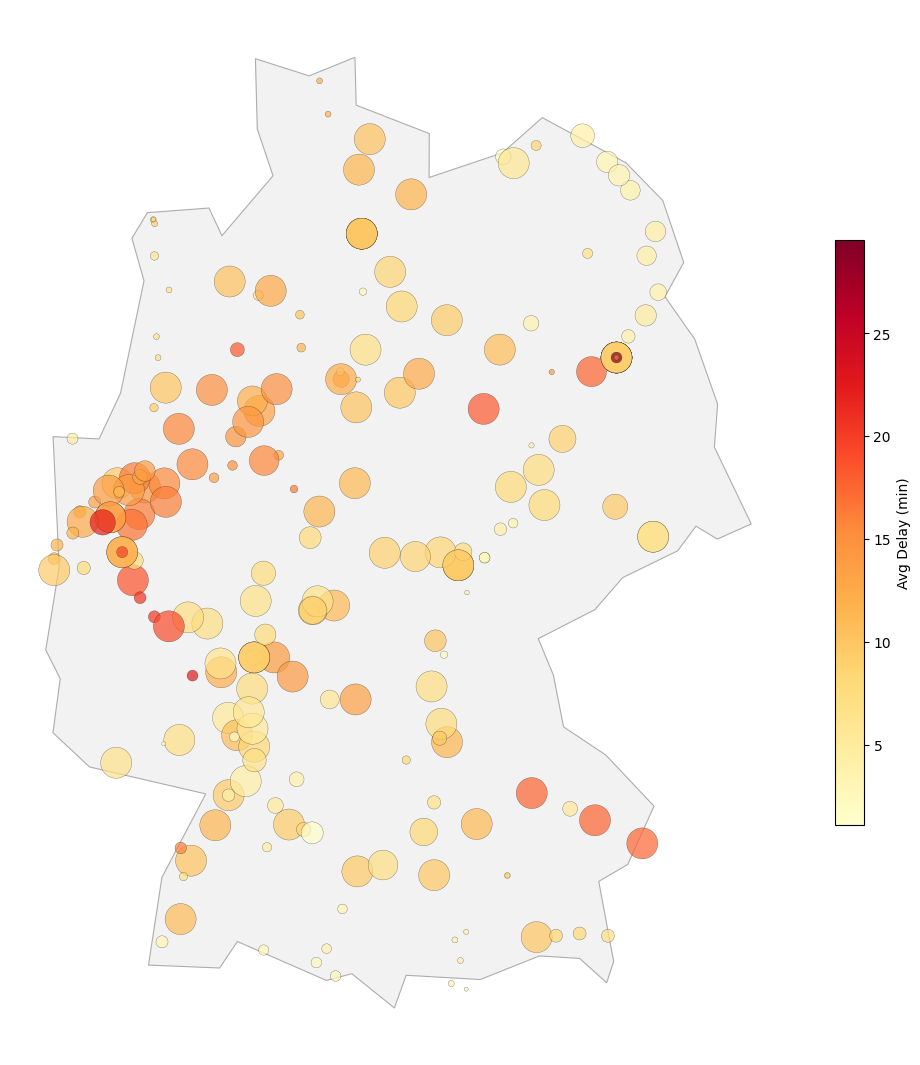

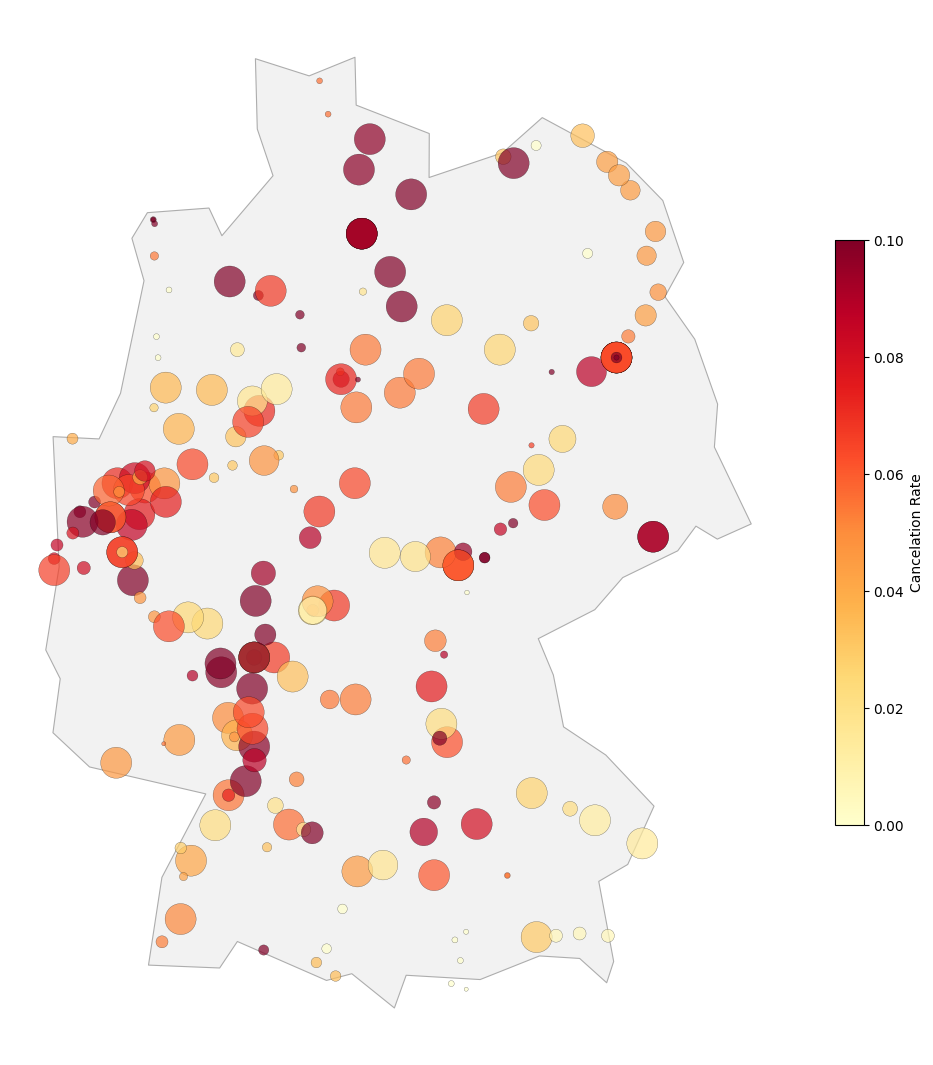

In [9]:
gdf = gpd.GeoDataFrame(
    station_delay_ICE,
    geometry=gpd.points_from_xy(station_delay_ICE.Longitude, station_delay_ICE.Latitude),
    crs="EPSG:4326"
).to_crs(epsg=3035)

fig, ax = plt.subplots(figsize=(10, 12))

germany.plot(ax=ax, color='#f2f2f2', edgecolor='#adadad', linewidth=0.8)

# Delay Data
scatter = gdf.plot(
    ax=ax,
    column='avg_delay',
    cmap='YlOrRd',
    legend=True,
    markersize=gdf['sample_size'].clip(upper=1000) * 0.5,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.2,
    legend_kwds={'label': "Avg Delay (min)", 'shrink': 0.5}
)
ax.set_axis_off()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 12))
germany.plot(ax=ax, color='#f2f2f2', edgecolor='#adadad', linewidth=0.8)

# Delay Data
scatter = gdf.plot(
    ax=ax,
    column='cancellation_rate',
    cmap='YlOrRd',
    legend=True,
    markersize=gdf['sample_size'].clip(upper=1000) * 0.5,
    alpha=0.7,
    vmax=0.1,
    edgecolor='black',
    linewidth=0.2,
    legend_kwds={'label': "Cancelation Rate", 'shrink': 0.5}
)
ax.set_axis_off()
plt.tight_layout()

plt.show()